## Import the libraries needed

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

## Loading our dataset

In [36]:
df = pd.read_csv('final.csv')
len(df)

38411

In [37]:
df.head()

,Unnamed: 0,name,endTime,artistName,trackName,msPlayed,datetime,danceability,energy,key,...,type,id,uri,track_href,analysis_url,duration_ms,time_signature,albumName,albumID,preference
0,0,Johnny Cash___Wage War,7/12/2022 5:34,Wage War,Johnny Cash,232413,7/12/2022 5:34,0.490,0.615,4,...,audio_features,4sBOU30e7J2KF2VzBwDG2M,spotify:track:4sBOU30e7J2KF2VzBwDG2M,https://api.spotify.com/v1/tracks/4sBOU30e7J2K...,https://api.spotify.com/v1/audio-analysis/4sBO...,216000,4,Johnny Cash (Stripped),0NBqAEzV88JB497CabtJCn,1
1,1,Seven Hills___While She Sleeps,7/12/2022 5:37,While She Sleeps,Seven Hills,262546,7/12/2022 5:37,0.457,0.968,5,...,audio_features,7cBkZ5cBvMUrHoCtsoDotj,spotify:track:7cBkZ5cBvMUrHoCtsoDotj,https://api.spotify.com/v1/tracks/7cBkZ5cBvMUr...,https://api.spotify.com/v1/audio-analysis/7cBk...,262547,4,This Is The Six (Deluxe),5WYyxZVi03JrSvwOr9LgCW,1
2,2,Engine 45___The Ghost Inside,7/12/2022 5:41,The Ghost Inside,Engine 45,252155,7/12/2022 5:41,0.493,0.948,10,...,audio_features,70SkWedrjKzDgKrqHZwAf4,spotify:track:70SkWedrjKzDgKrqHZwAf4,https://api.spotify.com/v1/tracks/70SkWedrjKzD...,https://api.spotify.com/v1/audio-analysis/70Sk...,252155,4,Get What You Give,3r2Tup1FQ1xiDr78Q7s71v,1
3,3,Impermanence___Architects,7/12/2022 5:45,Architects,Impermanence,242356,7/12/2022 5:45,0.374,0.895,8,...,audio_features,3p7qbTzPf4jKeEEwy765sI,spotify:track:3p7qbTzPf4jKeEEwy765sI,https://api.spotify.com/v1/tracks/3p7qbTzPf4jK...,https://api.spotify.com/v1/audio-analysis/3p7q...,242356,4,For Those That Wish To Exist,7qemUq4n71awwVPOaX7jw4,1
4,4,Square Hammer___Ghost,7/12/2022 5:48,Ghost,Square Hammer,239293,7/12/2022 5:48,0.530,0.903,2,...,audio_features,2XgTw2co6xv95TmKpMcL70,spotify:track:2XgTw2co6xv95TmKpMcL70,https://api.spotify.com/v1/tracks/2XgTw2co6xv9...,https://api.spotify.com/v1/audio-analysis/2XgT...,239293,4,Meliora (Deluxe Edition),3bChCUtpRC1NaCLYD4unbD,1


## Data pre-processing

Make key and mode into categorical values

In [38]:
df['key'] = df['key'].astype('category')

In [39]:
df['mode'] = df['mode'].astype('category')

Shuffle the dataframe

In [40]:
df = df.sample(frac=1, random_state=42)

Remove duplicates from the dataset

In [41]:
df = df.drop_duplicates()

len(df)

38411

Drop extra columns (by keeping the columns we want)

In [42]:
df = df[['danceability', 'energy','key','loudness','mode','speechiness','acousticness','instrumentalness','liveness','valence','tempo', 'preference']]
# preference col can be used for other analysis
df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,preference
15266,0.452,0.563,4,-6.607,1,0.0272,0.144000,0.000000,0.1430,0.2090,137.715,1
3265,0.106,0.986,1,-4.179,1,0.1060,0.000020,0.000077,0.0719,0.0557,175.981,1
34049,0.536,0.720,7,-11.277,0,0.0436,0.002020,0.000127,0.3570,0.6330,117.367,1
12539,0.334,0.971,1,-2.585,1,0.1410,0.000242,0.000000,0.1020,0.2680,195.135,1
9370,0.196,0.978,1,-4.555,1,0.1720,0.000144,0.050200,0.0898,0.3330,179.151,1


Split data into features and target variable. Although, in this case, we will not be using our target variable

In [43]:
X = df.iloc[:, 1:-1].values
y = df.iloc[:, -1].values

Define a scaling function for numpy arrays. This function makes sure that our numeric values have a mean of 0 and a standard deviation of 1.

In [44]:
def scale_features(X):
    for i in range(X.shape[1]):
        col = X[:, i]
        if np.issubdtype(col.dtype, np.number):  # check if the column is numeric
            col = col.astype(float)
            X[:, i] = (col - col.mean()) / col.std()  # scale the column

Apply the scaling function to X

In [45]:
scale_features(X)

X[:5]

array([[-2.30329656, -0.45927308, -0.94273929,  0.92955297, -1.0792426 ,
         0.93547884, -0.33383549, -0.48209698, -0.75225177,  0.19114764],
       [ 0.68592288, -1.34762246,  0.27989983,  0.92955297,  0.03139446,
        -0.29258781, -0.33333717, -0.8948328 , -1.44388257,  1.42910655],
       [-1.19382268,  0.4290763 , -3.29435573, -1.07578593, -0.84809479,
        -0.27552643, -0.33301036,  0.76017397,  1.1606736 , -0.46713878],
       [ 0.57992219, -1.34762246,  1.08257148,  0.92955297,  0.52469772,
        -0.29069172, -0.33383549, -0.72010216, -0.4860664 ,  2.04876539],
       [ 0.62938918, -1.34762246,  0.09056197,  0.92955297,  0.96162347,
        -0.2915276 , -0.00768103, -0.79092322, -0.19281133,  1.53166051]])

Perform PCA with 2 components

In [46]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X)

Create a scatter plot of the feature vectors

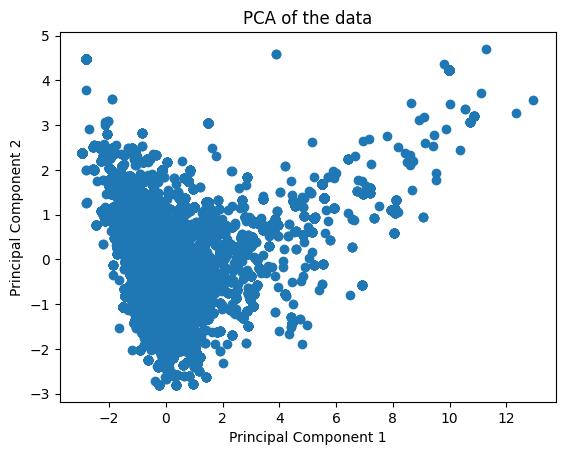

In [47]:
plt.scatter(principal_components[:, 0], principal_components[:, 1])
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA of the data")
plt.show()

Get the principal axes in feature space

In [48]:
feature_vectors = pca.components_.T

Set scaling factor for feature vectors

In [49]:
scale_factor = 4

Plot the feature vectors

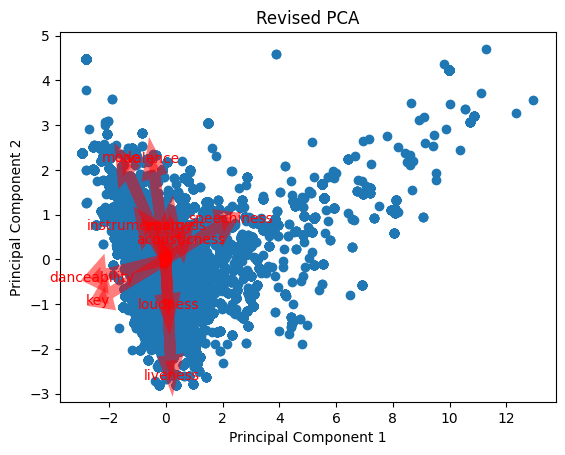

In [50]:
plt.scatter(principal_components[:, 0], principal_components[:, 1])
for i, feature_vector in enumerate(feature_vectors):
    plt.arrow(0, 0, feature_vector[0]*scale_factor, feature_vector[1]*scale_factor, 
              color='r', alpha=0.5, linewidth=2*scale_factor, 
              head_width=0.1*scale_factor, head_length=0.1*scale_factor)
    plt.text(feature_vector[0]*scale_factor*1.15, feature_vector[1]*scale_factor*1.15, 
             df.columns[:-1][i], color='r', ha='center', va='center')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title('Revised PCA')    
plt.show()

In [51]:
# plt.savefig('pca.png')

<Figure size 640x480 with 0 Axes>